### Data import, cleaning, visualization
#### Intro to ML workshop: 2018-08-18

In [1]:
# Import libraries

# Data exploration
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# The % signifies a ipynb "magic function". This line allows the figure to be rendered in the notebook next to the
# code. 
%matplotlib inline

In [2]:
# Read in the data. Remember to pass in the full file path!
data_df = pd.read_csv('../data/commute-times-train.csv')

In [3]:
# Read in the first five rows of data.
data_df.head()

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
0,0,-0.182809,0.361579,0.485623,0.300347,2018-08-13 16:56:00,BUS,25.156297
1,1,0.160297,0.064330,0.702545,-0.116307,2018-08-13 18:19:00,CAR,12.937429
2,2,0.762229,0.486693,0.197252,0.790051,2018-08-13 17:36:00,BIKE,29.013729
3,3,0.187947,0.508487,-0.372924,-0.914006,2018-08-13 07:41:00,CAR,18.215423
4,4,-0.431013,-0.600620,0.729273,0.215633,2018-08-13 15:56:00,TRAIN,11.196802


In [4]:
# Other options include using .tail() and .sample(). You can specify how many rows of data to see. The default is 5. 
data_df.sample(3)

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
12215,12215,0.292541,-0.360072,0.390541,0.730669,2018-08-13 15:33:00,TRAIN,8.352968
18870,18870,-0.076991,0.261773,0.416794,-0.206213,2018-08-13 08:49:00,BUS,24.717752
16008,16008,-0.012110,0.684097,-0.517205,-0.074971,2018-08-13 07:43:00,BUS,23.980197


In [5]:
# Other methods to use to get some information about your dataset. By default, using .describe() provides some summary
# statistics of what kind of data?
data_df.describe()

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,commute_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,-0.002115,0.001366,0.004656,-0.002148,19.742193
std,5773.647028,0.494554,0.501270,0.498530,0.498508,8.234790
min,0.000000,-0.996771,-0.997894,-0.998336,-0.997937,0.353436
25%,4999.750000,-0.394784,-0.404452,-0.397990,-0.402976,13.298351
50%,9999.500000,-0.002029,0.003488,0.007838,-0.001741,18.741689
75%,14999.250000,0.392261,0.406670,0.405283,0.398388,25.434019
max,19999.000000,0.999195,0.998077,0.997996,0.997447,49.819117


In [19]:
# In case it is of interest, there are kwargs that will provide additional information.
data_df.describe(include='all')

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000,20000.000000
unique,NaN,NaN,NaN,NaN,NaN,1356,5,NaN
top,NaN,NaN,NaN,NaN,NaN,2018-08-13 08:07:00,CAR,NaN
freq,NaN,NaN,NaN,NaN,NaN,70,6995,NaN
mean,9999.500000,-0.002115,0.001366,0.004656,-0.002148,NaN,NaN,19.742193
std,5773.647028,0.494554,0.501270,0.498530,0.498508,NaN,NaN,8.234790
min,0.000000,-0.996771,-0.997894,-0.998336,-0.997937,NaN,NaN,0.353436
25%,4999.750000,-0.394784,-0.404452,-0.397990,-0.402976,NaN,NaN,13.298351
50%,9999.500000,-0.002029,0.003488,0.007838,-0.001741,NaN,NaN,18.741689
75%,14999.250000,0.392261,0.406670,0.405283,0.398388,NaN,NaN,25.434019


In [6]:
# There is a quick way to learn what size dataset you are working with. .shape will return (rows, columns).
data_df.shape

(20000, 8)

In [7]:
# It's important to know what data types are in your dataset! Never make assumptions about the data you are working
# with.
for col in data_df.columns:
    print(f'{col} - {data_df[col].dtype}')

Unnamed: 0 - int64
source_latitude - float64
source_longitude - float64
destination_latitude - float64
destination_longitude - float64
time_of_day_ts - object
commute_type - object
commute_time - float64


In [8]:
# .dtypes will give you the same information. Aren't f-strings fun though?
data_df.dtypes

Unnamed: 0                 int64
source_latitude          float64
source_longitude         float64
destination_latitude     float64
destination_longitude    float64
time_of_day_ts            object
commute_type              object
commute_time             float64
dtype: object

### np.NaN != [None, 0] 
### NaN is very useful because you can leverage vectorized operations in numpy. The data type for each of those values (NaN, None, 0) is different. Think about this when you consider how to impute or otherwise handle missing data.

In [9]:
# Is there any missing data in this dataset?
data_df.isnull().values.any()

False

In [18]:
# If there are NaNs, how many are there? 
data_df.isnull().sum().sum()

0

In [20]:
# It's useful to be able to pinpoint missing data by column.
for col in data_df.columns:
    print(col, data_df[col].isnull().sum())

Unnamed: 0 0
source_latitude 0
source_longitude 0
destination_latitude 0
destination_longitude 0
time_of_day_ts 0
commute_type 0
commute_time 0


### Let's continue learning about the data through visualizations

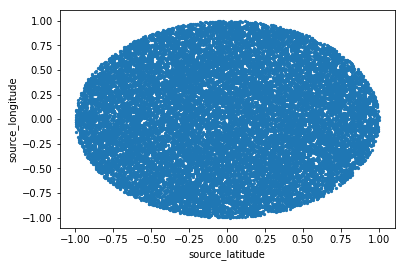

In [22]:
# Can we discern any information from lat long?
data_df.plot.scatter(x='source_latitude', y='source_longitude', marker='.');

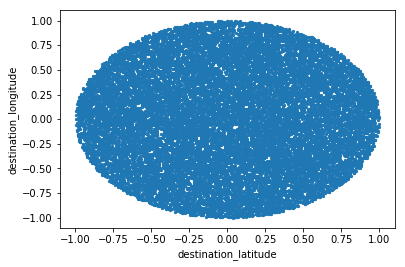

In [23]:
data_df.plot.scatter(x='destination_latitude', y='destination_longitude', marker='.');

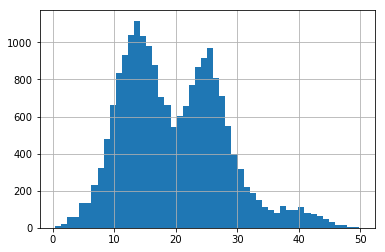

In [27]:
# This will tell you the frequency of commute times.
data_df['commute_time'].hist(bins=50);
# data_df.hist(column='time_of_day_ts'); Why isn't this version working right now?

In [ ]:
# TO DO: run this cell BEFORE converting column type to run into error. Look into dtype!
data_df.hist(column='time_of_day_ts', by='commute_type');

In [31]:
# How the column time_of_day_ts is structured makes it difficult to use for graphing. A relevant data type that plays
# nicely with graphing methods?
data_df['time_of_day_ts'] = pd.to_datetime(data_df['time_of_day_ts'])

In [34]:
# This is a nice summary table, but let's graph this out somehow.
data_df.groupby('commute_type').size()

commute_type
BIKE     3008
BUS      6453
CAR      6995
TRAIN    2498
WALK     1046
dtype: int64

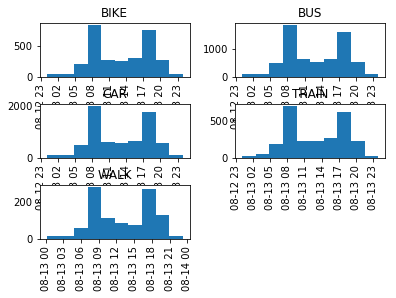

In [32]:
data_df.hist(column='time_of_day_ts', by='commute_type');

In [ ]:
# Need to fix x axis of graphs below

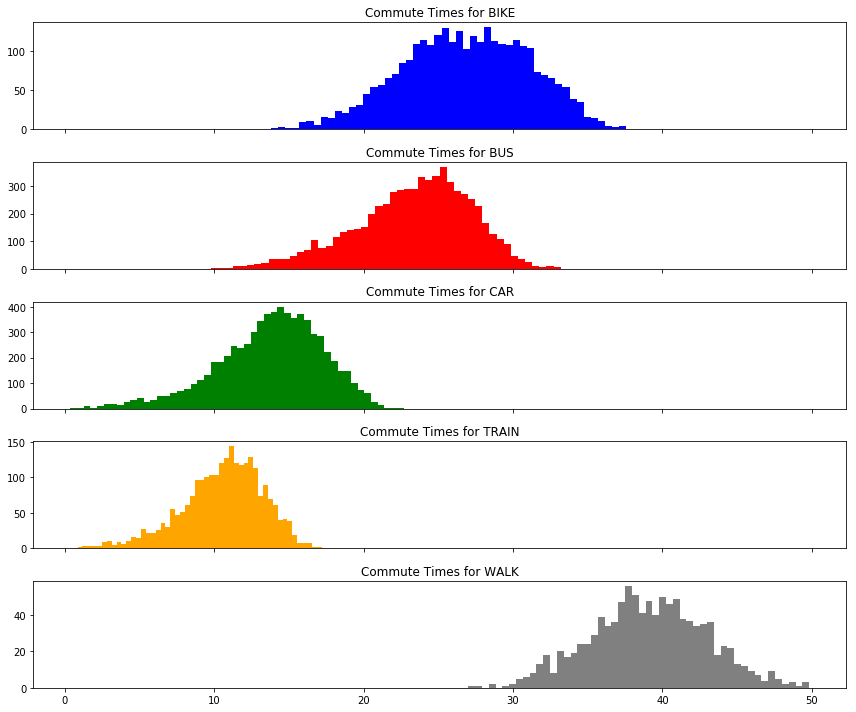

In [35]:
# Simplify for following
commute_type = data_df['commute_type']
commute_time = data_df['commute_time']

# Examine the distribution of commute times by commute types.
fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)
colors = ['blue', 'red', 'green', 'orange', 'grey']

for ax, ctype, color in zip(axs, np.unique(commute_type), colors):
    ctime = commute_time[commute_type == ctype]
    ax.hist(ctime, bins=50, color=color)
    ax.set_title(f'Commute Times for {ctype}')
fig.tight_layout()

![dist_image](https://slideplayer.com/slide/4829376/15/images/8/Some+Euclidean+Distances.jpg "Euclidean")

In [37]:
# Create new columns for distance using source and destination location information. Feature engineering?!
# How else could you measure distance?
data_df['distance_l2'] = np.sqrt((data_df['source_latitude'] - data_df['destination_latitude'])**2 + \
(data_df['source_longitude'] - data_df['destination_longitude'])**2)

data_df['distance_l1'] = np.abs(data_df['source_latitude'] - data_df['destination_latitude']) + \
np.abs(data_df['source_longitude'] - data_df['destination_longitude'])

In [ ]:
# Correlation plot?
# plt.xcorr()

In [ ]:
# How to add to current data frame in the correct orientation? Know your axes.
data_df = pd.concat([data_df, pd.get_dummies(data_df['commute_type'])], axis=1)

In [36]:
# 8/14/18
# For feature engineering, get_dummies was introduced above. What about log transforming commute time? See Hanna's nb

In [ ]:
# This might be a bonus feature: distance (diff of time of day, timedelta?) of point to peak 
# Find the first peak
# For each point, determine which peak is closest to that point.
# Calculate the distance
first_peak = data_df['time_of_day']==

# How to do this?
# 1. Smooth the data and find deriv (pro: Have to deal with one peak, not 2!)
# 2. tmp dfs to split into 2 and find distance (what kind of distance?) to peak?
# 

In [ ]:
# To add
# EDA steps (shape, describe, dtypes, head/tail/sample)
# Worthwhile concepts to introduce? colinearity and correlation plot? maybe too much in the weeds (bonus concept)
# Vizualizations: pandas vs introducing matplotlib & seaborn
# new features (L1, L2 distance; get dummies (this will also introduce concept of adding to df))
# What about transforming any of the current variables? eg log transform of commute time
# plotting (bar plot commute type, scatter/histo time of day -> facet = commute type)
# Bonus or plant seed for further exploration during hack time: map start and destination locations (choropleth?)?